<h1>Loan Interest Rate Prediction

<h2>Lifecycle of Machine Learning Project</h2>

1. Understanding of problem Statement
2. Data Collection
3. Data checks for performance
4. Exploratory Data Analysis
5. Data Pre Processing
6. Model Training
7. Choose Best Model

<h3>1. Understanding of Problem Statment</h3>


The problem statement for a loan interest rate prediction machine learning project can be formulated as follows:

Develop a machine learning model that can accurately predict the interest rate a borrower will be offered for a loan, given a set of applicant and loan characteristics.

This involves building a model that learns the relationships between various factors that influence loan interest rates, such as:

<h4>Applicant factors:</h4>

- Credit history (e.g., credit score, delinquencies, bankruptcies)
- Income and employment status
- Loan amount and purpose
- Debt-to-income ratio
- Years at current residence

<h4>Loan characteristics:</h4>

- Loan type (e.g., mortgage, auto, personal)
- Loan term (length of repayment period)
- Collateral involved (if any)

<h4>Challenges:</h4>

- Data availability: Loan data can be sensitive, so obtaining a large and representative dataset might be challenging.
- Data quality: Loan data may contain missing values or inconsistencies that need to be addressed.
- Model fairness: It's crucial to ensure the model doesn't discriminate against any specific borrower group.

<h4>Benefits:</h4>

- Improved loan pricing: Lenders can set more competitive interest rates based on borrower risk profiles.
- Faster loan approvals: Automating the interest rate prediction can streamline loan processing.
- Enhanced customer experience: Borrowers can receive a more personalized loan offer.

<h4>Evaluation Criteria:</h4>

The success of the model will be evaluated based on its ability to predict loan interest rates accurately. Common metrics used for evaluation include:

- Mean Squared Error (MSE): Measures the average squared difference between predicted and actual interest rates.
- Root Mean Squared Error (RMSE): Square root of MSE, representing the average prediction error in the same units as the target variable (interest rate).
- R-squared: Represents the proportion of variance in the actual interest rates explained by the model's predictions.

By building a robust and well-performing model, lenders can gain a significant advantage in loan pricing, approval efficiency, and overall customer satisfaction.

<h3>2. Data Collection</h3>

Data is collected from kaggle website.
https://www.kaggle.com/datasets/tarique7/credit-lending-interest-rates

We already have split of train and test data. hence for now we will only work on training data and split it further for validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'D:\DS_Stats\E2E_DS_Propjects\Loan_Interest_Rate_Prediction\Data\lending_train.csv')

In [3]:
df.shape

(8003, 38)

The data consists of 8002 rows and 38 columns

In [4]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,...,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate
0,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,6,...,8,6,1,92.9,0,moving,individual,28000,60,14.07
1,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,1,...,14,4,0,100.0,1,debt_consolidation,individual,5000,36,12.61
2,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,4,...,8,6,0,93.5,0,other,individual,2000,36,17.09
3,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,0,...,3,2,0,100.0,0,debt_consolidation,individual,21600,36,6.72
4,NaN,KY,OWN,34000.0,Not Verified,6.46,1,3.0,1990,6,...,12,5,3,78.1,0,other,individual,5000,36,6.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8003 entries, 0 to 8002
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_length                        7424 non-null   float64
 1   state                             8003 non-null   object 
 2   homeownership                     8003 non-null   object 
 3   annual_income                     8003 non-null   float64
 4   verified_income                   8003 non-null   object 
 5   debt_to_income                    8003 non-null   float64
 6   delinq_2y                         8003 non-null   int64  
 7   months_since_last_delinq          3507 non-null   float64
 8   earliest_credit_line              8003 non-null   int64  
 9   inquiries_last_12m                8003 non-null   int64  
 10  total_credit_lines                8003 non-null   int64  
 11  open_credit_lines                 8003 non-null   int64  
 12  total_

<h3>3. Performing Data Check and EDA</h3>

- Check Duplicates
- Check Datatypes
- Check numbers of unique values in a column
- Check the statistics of the dataset
- Check various categories present in different categorical columns
- Check for missing values
- EDA

<h4>3.1 Check Duplicates

In [6]:
df.duplicated().sum()

0

We can see in the data that customers personal details like name or Loan ID or Customer ID is not provided. Hence we are assuming that all the data here is of unique customers.

Also we can see that none of the records are exact match of each other. Hence all the records are unique.

<h4>3.2 Check Datatypes of Features

In [7]:
column_datatypes = df.dtypes
print(column_datatypes)

emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts       

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O' ]
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O' ]

print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Numerical Feature which are : {numerical_features}')

We have 5 Categorical Feature which are : ['state', 'homeownership', 'verified_income', 'loan_purpose', 'application_type']

We have 33 Numerical Feature which are : ['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y', 'months_since_last_delinq', 'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines', 'total_credit_limit', 'total_credit_utilized', 'num_collections_last_12m', 'num_historical_failed_to_pay', 'months_since_90d_late', 'current_accounts_delinq', 'total_collection_amount_ever', 'current_installment_accounts', 'accounts_opened_24m', 'months_since_last_credit_inquiry', 'num_satisfactory_accounts', 'num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'num_active_debit_accounts', 'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts', 'num_cc_carrying_balance', 'num_mort_accounts', 'account_never_delinq_percent', 'public_record_bankrupt', 'loan_amount', 'term', 'interest_rate']


<h4>3.3 Check for Unique Values in Feature

In [9]:
df.nunique()

emp_length                            11
state                                 50
homeownership                          3
annual_income                       1200
verified_income                        3
debt_to_income                      3109
delinq_2y                             12
months_since_last_delinq              94
earliest_credit_line                  53
inquiries_last_12m                    24
total_credit_lines                    76
open_credit_lines                     45
total_credit_limit                  7321
total_credit_utilized               7686
num_collections_last_12m               4
num_historical_failed_to_pay           9
months_since_90d_late                101
current_accounts_delinq                2
total_collection_amount_ever         773
current_installment_accounts          30
accounts_opened_24m                   26
months_since_last_credit_inquiry      25
num_satisfactory_accounts             45
num_accounts_120d_past_due             1
num_accounts_30d

<h4>3.4 Check Statistic for Numerical Features

In [10]:
df.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_amount,term,interest_rate
count,7424.000000,8.003000e+03,8003.000000,8003.000000,3507.000000,8003.000000,8003.000000,8003.000000,8003.000000,8.003000e+03,...,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000
mean,5.863012,8.252458e+04,17.330280,0.217543,36.758483,2001.448582,1.959390,22.698363,11.468574,1.766365e+05,...,27602.041484,13.157441,8.208047,5.313757,1.315007,94.552143,0.124328,15752.192928,42.756466,12.296301
std,3.718175,6.801831e+04,8.755412,0.692937,21.528397,7.770158,2.358301,11.952521,5.945336,1.876817e+05,...,26812.332950,7.962073,4.988647,3.378245,1.707668,9.267637,0.335609,10091.052947,10.794439,4.913928
min,0.000000,5.235000e+03,0.000000,0.000000,1.000000,1963.000000,0.000000,2.000000,0.000000,0.000000e+00,...,0.000000,2.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1000.000000,36.000000,5.310000
25%,2.000000,4.800000e+04,10.720000,0.000000,19.000000,1998.000000,0.000000,14.000000,7.000000,4.901900e+04,...,10000.000000,7.000000,5.000000,3.000000,0.000000,92.300000,0.000000,8000.000000,36.000000,7.970000
50%,6.000000,6.852000e+04,16.790000,0.000000,34.000000,2003.000000,1.000000,21.000000,10.000000,1.059220e+05,...,19700.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,13000.000000,36.000000,11.980000
75%,10.000000,1.000000e+05,23.370000,0.000000,52.500000,2006.000000,3.000000,30.000000,15.000000,2.566405e+05,...,36300.000000,17.000000,11.000000,7.000000,2.000000,100.000000,0.000000,21000.000000,60.000000,15.050000
max,10.000000,2.300000e+06,39.990000,13.000000,118.000000,2015.000000,29.000000,87.000000,51.000000,3.386034e+06,...,386700.000000,66.000000,46.000000,43.000000,14.000000,100.000000,3.000000,40000.000000,60.000000,30.940000


<h4>3.5 Check for various categories present in categorical feature

In [11]:
for feature in categorical_features:
    unique_category = df[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in state are ['NJ' 'HI' 'WI' 'PA' 'KY' 'AZ' 'NV' 'IL' 'SC' 'CO' 'FL' 'TN' 'CA' 'TX'
 'VA' 'NY' 'GA' 'MO' 'MD' 'NC' 'NH' 'UT' 'DE' 'OR' 'OH' 'OK' 'SD' 'MN'
 'MA' 'AL' 'WY' 'LA' 'WV' 'IN' 'MI' 'KS' 'AR' 'MS' 'WA' 'NE' 'ME' 'VT'
 'CT' 'NM' 'AK' 'RI' 'ND' 'MT' 'DC' 'ID']

Categories in homeownership are ['MORTGAGE' 'RENT' 'OWN']

Categories in verified_income are ['Verified' 'Not Verified' 'Source Verified']

Categories in loan_purpose are ['moving' 'debt_consolidation' 'other' 'home_improvement' 'credit_card'
 'medical' 'house' 'small_business' 'major_purchase' 'car' 'vacation'
 'renewable_energy']

Categories in application_type are ['individual']


<h4>3.6 Check for Missing Values and Analysis</h4>

In [12]:
null_percentage= df.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

emp_length                           7.234787
months_since_last_delinq            56.178933
months_since_90d_late               76.546295
months_since_last_credit_inquiry    12.395352
num_accounts_120d_past_due           3.811071
dtype: float64


<Axes: >

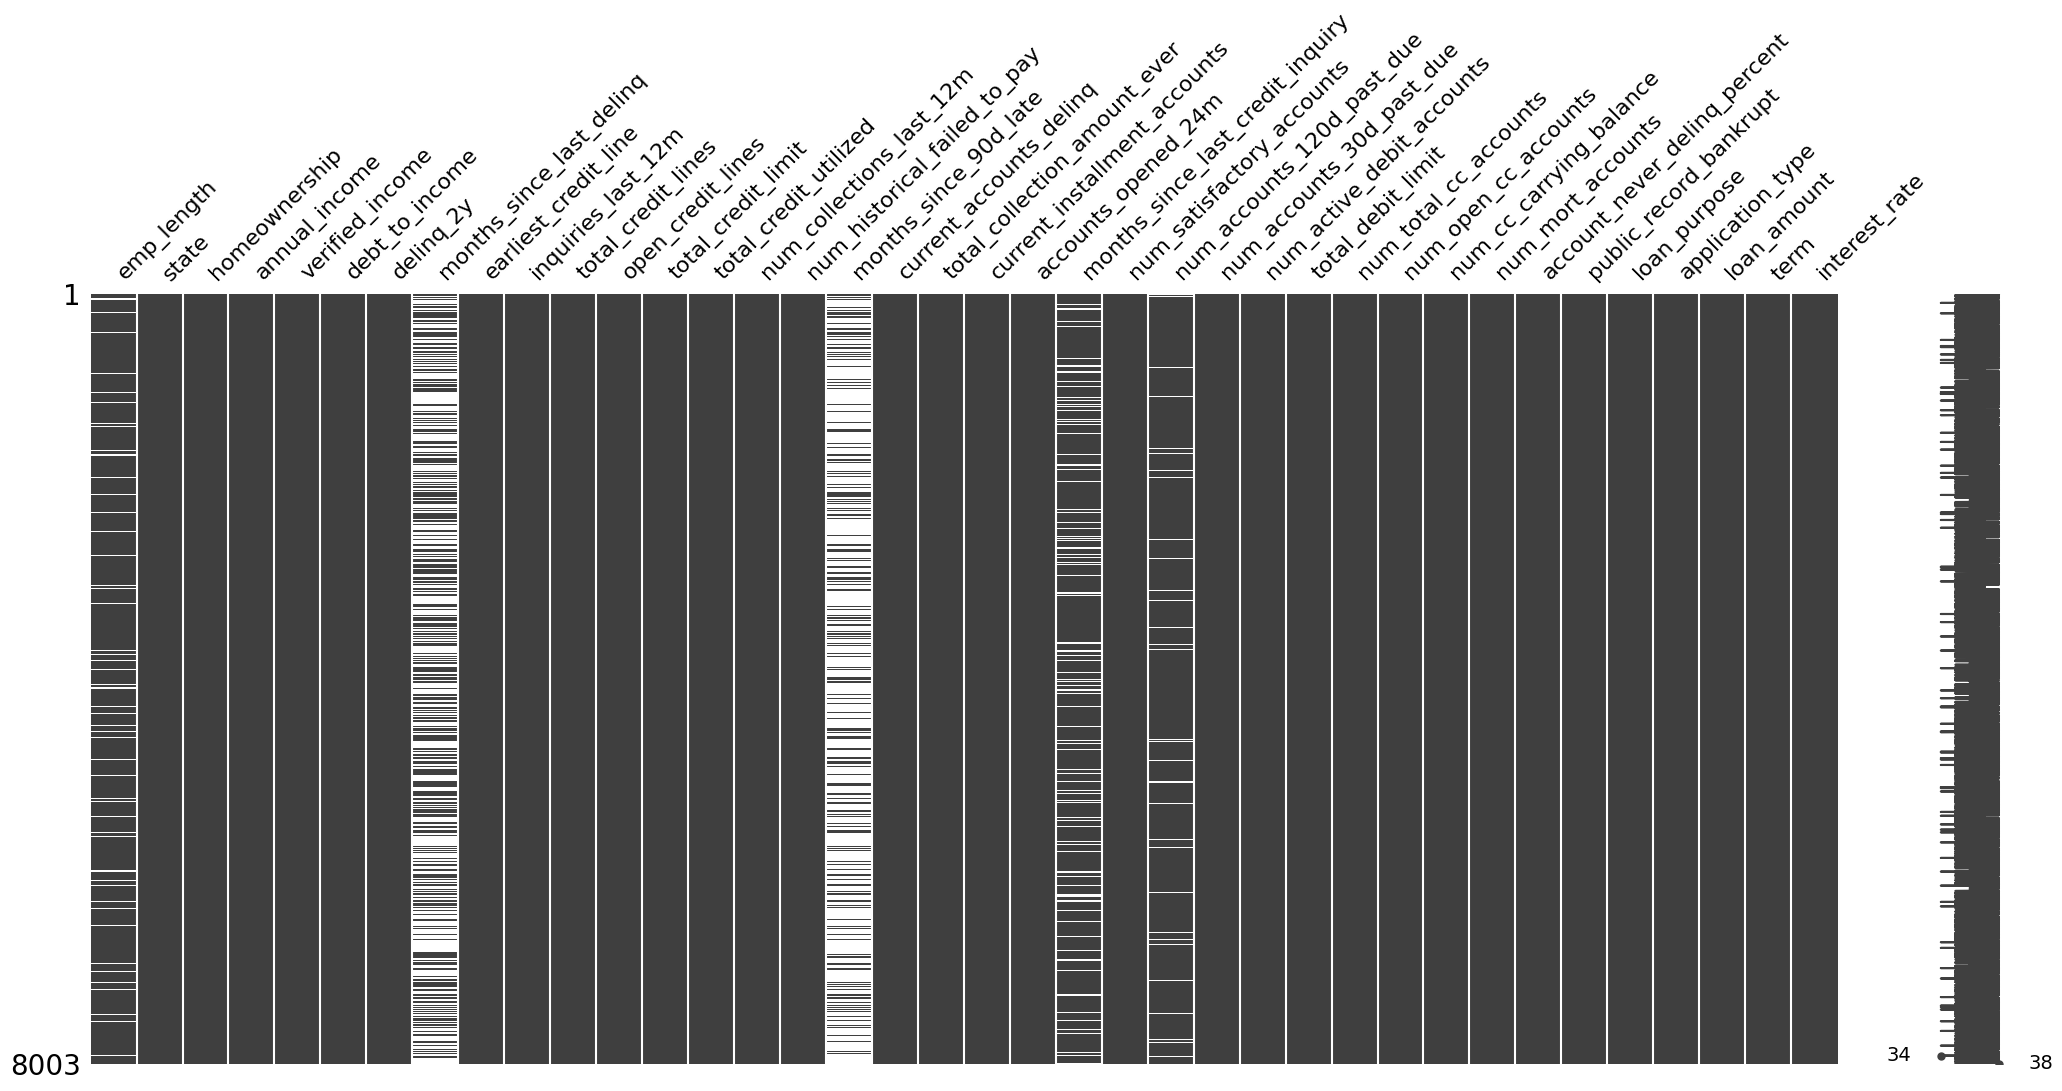

In [13]:
import missingno as msno
msno.matrix(df)

<Axes: >

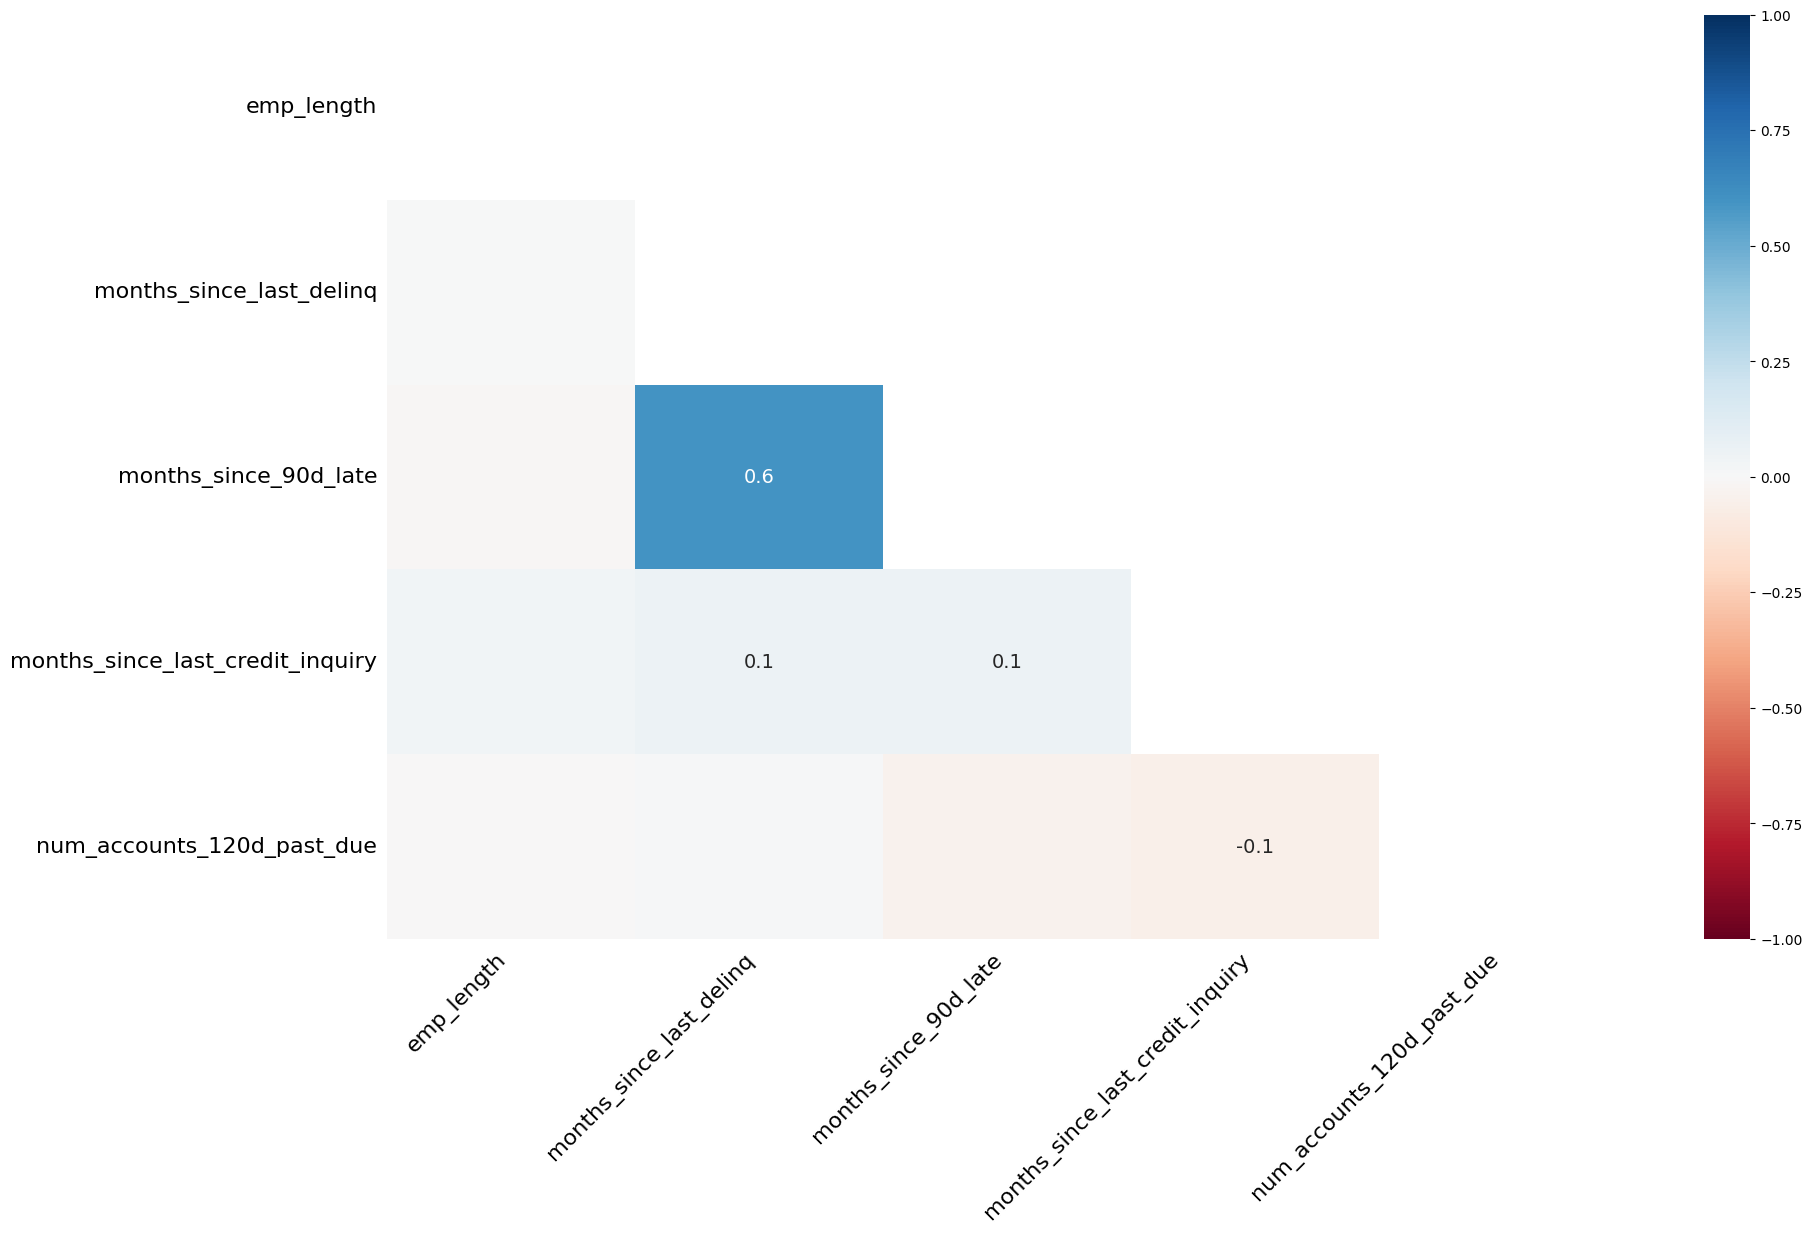

In [14]:
msno.heatmap(df)

<Axes: >

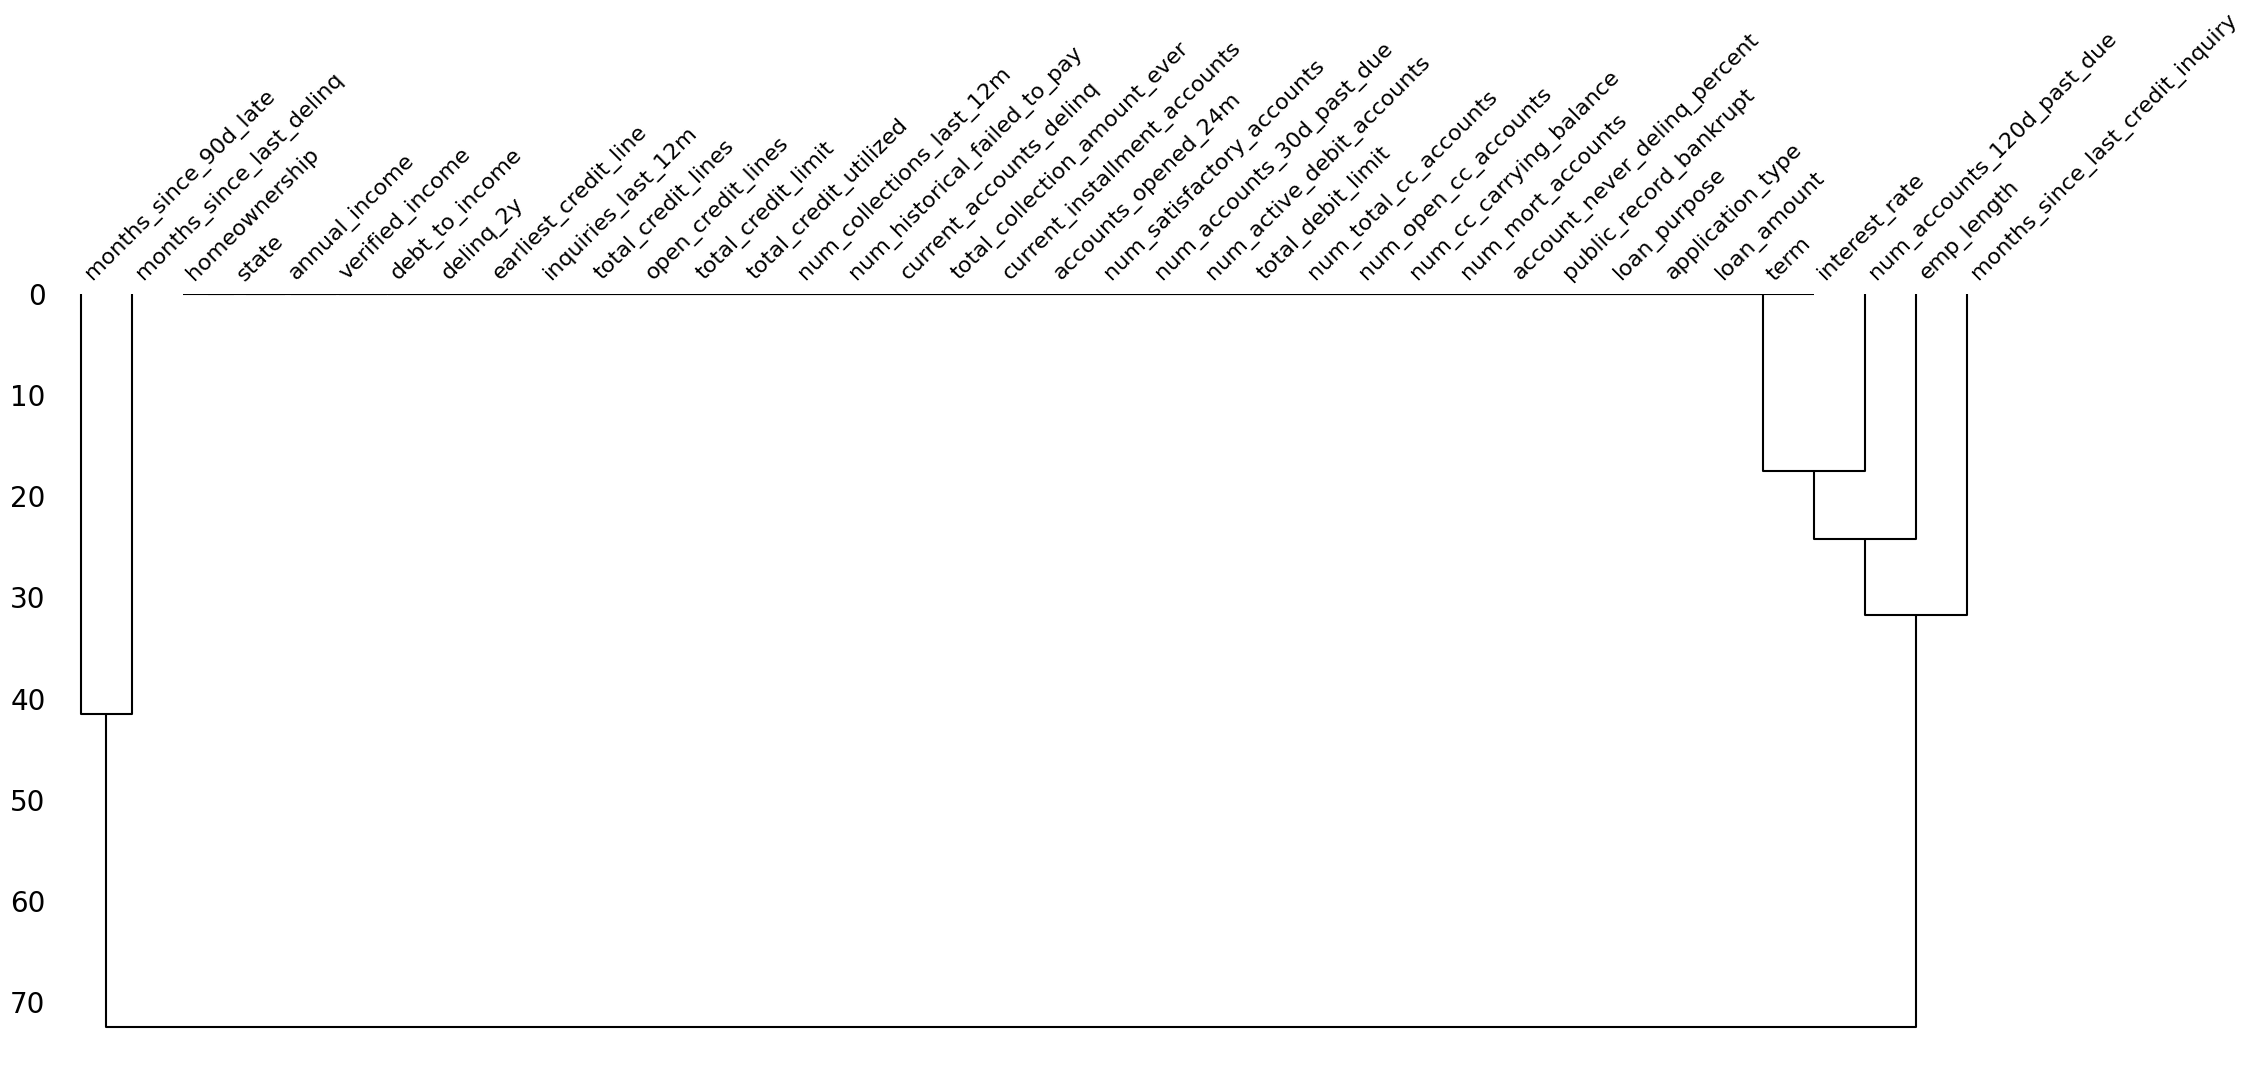

In [15]:
msno.dendrogram(df)

Insights:

- Its a relatively clean dataset where we found missing values in 4 features with highest missing percentage of 76.5%
- We have also found if records from the 'months_since_90d_late' feature are missing then some records from 'months_since_last_delinq' are also missing. They have a correlation value of 0.6 for nullity.
- Rest of the features with null values have very low correlation or no correlation at all.

<h4>3.7 Exploratory Data Analysis(EDA)

<h5>3.7.1 Visualisation of Interest Rate(Target Feature)

We will first write helper functions for better understanding and visualisation of features

In [16]:
def explore_num_feature(df, variable):
    """
    This function explores a numerical feature in a pandas dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the feature.
        variable (str): The name of the feature to explore.
    """

    # Print the name of the feature
    print(f'Name of the Feature is {variable}')

    # Determine the feature type (categorical or numerical)
    if df[variable].dtype == 'object':
        feature_type = 'Categorical Feature'
    else:
        feature_type = 'Numerical Feature'
    print(f'{variable} is {feature_type}')

    # Count the number of unique values
    num_unique_values = df[variable].nunique()
    print(f'The number of unique values in {variable} is {num_unique_values}')

    # For categorical features, prompt for sub-type (ordinal/nominal)
    if feature_type == 'Categorical Feature':
        sub_type = input(f'The {variable} is {feature_type}, please sub categorize the feature as Ordinal/Nominal: ')
    else:
        # For numerical features with less than 100 unique values, consider them discrete
        if num_unique_values < 25:
            sub_type = 'Discrete'
        else:
            sub_type = 'Continuous'

    print(f'{variable} is {feature_type} and {sub_type}')

    # Calculate null percentage for the feature
    null_percentage = df.isnull().sum() / df.shape[0] * 100
    null_percentage_variable = null_percentage[variable]
    print(f'Null %age of {variable} is {null_percentage_variable}%')

    # Find outliers using Interquartile Range (IQR)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR is {IQR}')
    outliers = df[variable][
        (df[variable] < (Q1 - 1.5 * IQR)) |
        (df[variable] > (Q3 + 1.5 * IQR))
    ]

    # Identify minimum and maximum outlier values with their counts
    min_outlier_val = df[variable].min()
    min_outlier_count = df[variable].value_counts().get(min_outlier_val, 0)

    max_outlier_val = df[variable].max()
    max_outlier_count = df[variable].value_counts().get(max_outlier_val, 0)

    # Calculate quantiles, skewness, and kurtosis
    quantile = df[variable].quantile([0.0, 0.2, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9999])
    skewness = stats.skew(df[variable])
    kurtosis = stats.kurtosis(df[variable])

    # Print a summary of the exploration
    print('\n\nSUMMARY')
    print(f'\nName of the Feature is {variable}')
    print(f'{variable} is {feature_type} and {sub_type}')
    print(f'Null %age of {variable} is {null_percentage_variable}%')
    print(f'The number of unique values in {variable} is {num_unique_values}')
    print(f'Total number of outliers in {variable} is {len(outliers)}')
    print(f'Minimum value of outliers in {variable} is {min_outlier_val}'
          f' and number of times its repeated is {min_outlier_count}')
    print(f'Maximum value of outliers in {variable} is {max_outlier_val}'
          f' and number of times its repeated is {max_outlier_count}')
    print(f'{variable} Skewness: {skewness}, Kurtosis: {kurtosis}')
    print(f'\nThe values at various quantiles are\n\n{quantile}')

    
    sub_type_confirmation = input(f'for feature {variable}, has the sub type {sub_type} correctly mentioned?\n'
                                  f'Type Yes/No:')
    
    if sub_type_confirmation == 'Yes':
        pass
    else:
        if sub_type == 'Discrete':
            sub_type = 'Continuous'
        else:
            sub_type == 'Discrete'
        print(f'\n\n{variable} is {feature_type} and sub type is updated to {sub_type}') 
    
    exploration_results = {
            'feature_name': variable,
            'feature_type': feature_type,
            'num_unique_values': num_unique_values,
            'sub_type': sub_type,
            'null_percentage': null_percentage_variable,
            'iqr': IQR,
            'outliers_count': len(outliers),
            'min_outlier': {
                'value': min_outlier_val,
                'count': min_outlier_count
            },
            'max_outlier': {
                'value': max_outlier_val,
                'count': max_outlier_count
            },
            'quantiles': quantile.to_dict(),
            'skewness': skewness,
            'kurtosis': kurtosis}

    return exploration_results

In [17]:
def explore_num_feature_distribution(df, variable):
    """
    This function visualizes the distribution of a numerical feature in a pandas dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the feature.
        variable (str): The name of the numerical feature to visualize.
    """

    # Create a figure with 4 rows and 1 column for subplots (adjusted size)
    fig, axs = plt.subplots(4, 1, figsize=(8, 12))

    # Visualize the distribution using a histogram
    sns.histplot(
        data=df,  # Data source for the histogram
        x=variable,  # Feature to plot on the x-axis
        kde=False,  # Do not plot the kernel density estimation
        color='skyblue',  # Set bar color
        bins=30,  # Number of bins for the histogram
        ax=axs[0]  # Assign plot to the first subplot
    )
    axs[0].set_title(f'Histogram of {variable}')  # Set subplot title
    axs[0].set_xlabel(f'{variable}')  # Set x-axis label
    axs[0].set_ylabel('Frequency')  # Set y-axis label

    # Plot the Kernel Density Estimation (KDE) plot
    sns.kdeplot(
        data=df,  # Data source for the KDE plot
        x=variable,  # Feature to plot on the x-axis
        color='skyblue',  # Set line color
        fill=True,  # Fill the area under the KDE curve
        ax=axs[1]  # Assign plot to the second subplot
    )
    axs[1].set_title(f'KDE Plot of Feature {variable}')  # Set subplot title
    axs[1].set_xlabel(f'{variable}')  # Set x-axis label
    axs[1].set_ylabel('Density')  # Set y-axis label

    # Visualize the distribution using a boxplot
    sns.boxplot(
        data=df,  # Data source for the boxplot
        x=df[variable],  # Feature to plot on the x-axis
        ax=axs[2]  # Assign plot to the third subplot
    )
    axs[2].set_title(f'Boxplot of {variable}')  # Set subplot title

    # Visualize the distribution using a Q-Q plot
    stats.probplot(df[variable], dist="norm", plot=plt)  # Create the Q-Q plot
    axs[3].set_title(f'Q-Q Plot of {variable}')  # Set subplot title for Q-Q plot (implicitly assigned to axs[3])

    plt.tight_layout()  # Adjust spacing between subplots for better readability
    plt.show()  # Display the plots

In [18]:
def bivariate_analysis_num_cat(df, num_feature, cat_feature):
    """
    This function performs a bivariate analysis between a numerical feature and a categorical feature in a pandas dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the features.
        num_feature (str): The name of the numerical feature.
        cat_feature (str): The name of the categorical feature.
    """

    # Create a figure with 3 rows and 1 column for subplots (adjusted height)
    fig, axs = plt.subplots(3, 1, figsize=(5, 12))  # Increase height to avoid overlapping plots

    # Visualize the distribution of the numerical feature colored by the categorical feature using a histogram
    sns.histplot(
        data=df,  # Data source for the histogram
        x=num_feature,  # Feature to plot on the x-axis
        hue=cat_feature,  # Categorical feature to color the bars
        kde=True,  # Include Kernel Density Estimation
        color='skyblue',  # Set bar color
        bins=30,  # Number of bins for the histogram
        ax=axs[0]  # Assign plot to the first subplot
    )
    axs[0].set_title(f'Histogram of {num_feature} colored by {cat_feature}')  # Set subplot title
    axs[0].set_xlabel(f'{num_feature}')  # Set x-axis label
    axs[0].set_ylabel('Frequency')  # Set y-axis label

    # Visualize the distribution of the numerical feature across categories using a violin plot
    sns.violinplot(
        data=df,  # Data source for the violin plot
        x=cat_feature,  # Categorical feature on the x-axis
        y=num_feature,  # Numerical feature on the y-axis
        inner='quartile',  # Show quartiles within the violin
        color='white',  # Set violin body color
        ax=axs[1]  # Assign plot to the second subplot
    )
    axs[1].set_title(f'Violinplot of {num_feature} by {cat_feature}')  # Set subplot title
    axs[1].set_xlabel(f'{cat_feature}')  # Set x-axis label
    axs[1].set_ylabel(f'{num_feature}')  # Set y-axis label

    # Visualize the distribution of the numerical feature across categories using a box plot
    sns.boxplot(
        data=df,  # Data source for the box plot
        x=cat_feature,  # Categorical feature on the x-axis
        y=num_feature,  # Numerical feature on the y-axis
        ax=axs[2]  # Assign plot to the third subplot
    )
    axs[2].set_title(f'Box Plot of {num_feature} vs {cat_feature}')  # Set subplot title

    plt.tight_layout()  # Adjust spacing between subplots for better readability
    plt.show()  # Display the plots


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_variables(df, numerical_variable_1, numerical_variable_2, figsize=(10, 6)):
    """
    Plots three visualizations (scatter, hexagonal binning, contours) for two numerical variables in a DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the numerical variables.
        numerical_variable_1 (str): The name of the first numerical variable.
        numerical_variable_2 (str): The name of the second numerical variable.
        figsize (tuple, optional): The desired figure size for the plots. Defaults to (10, 6).
    """

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(f"Visualizations of {numerical_variable_1} vs. {numerical_variable_2}")

    # Scatter Plot
    sns.scatterplot(x=numerical_variable_1, y=numerical_variable_2, data=df, ax=axes[0])
    axes[0].set_title("Scatter Plot")

    # Hexagonal Binning
    sns.histplot(x=numerical_variable_1, y=numerical_variable_2, data=df, cmap="Blues",
                 edgecolor="white", linewidth=0.5, bins="hex", ax=axes[1])
    axes[1].set_title("Hexagonal Binning")

    # Contours
    sns.kdeplot(x=numerical_variable_1, y=numerical_variable_2, data=df, shade=True, cmap="Reds", ax=axes[2])
    axes[2].set_title("Contours")

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()


In [19]:
def explore_cat_feature(df, variable):
    """
    This function explores a categorical feature in a pandas dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the feature.
        variable (str): The name of the categorical feature to explore.
    """

    # Print the name of the feature
    print(f'Name of the Feature is {variable}')

    # Determine the feature type (categorical or numerical)
    if df[variable].dtype == 'object':
        feature_type = 'Categorical Feature'
    else:
        feature_type = 'Numerical Feature'
    print(f'{variable} is {feature_type}')

    # Count the number of unique values
    num_unique_values = df[variable].nunique()
    print(f'The number of unique values in {variable} is {num_unique_values}')

    # Prompt for sub-type (ordinal/nominal) for categorical features
    if feature_type == 'Categorical Feature':
        sub_type = input(f'The {variable} is {feature_type}, please sub categorize the feature as Ordinal/Nominal: ')
    else:
        # Prompt for sub-type (continuous/discrete) for numerical features treated as categorical
        sub_type = input(f'The {variable} is {feature_type}, please sub categorize the feature as Continuous/Discrete: ')

    print(f'{variable} is {feature_type} and {sub_type}')

    # Calculate null percentage for the feature
    null_percentage = df.isnull().sum() / df.shape[0] * 100
    null_percentage_variable = null_percentage[variable]
    print(f'Null %age of {variable} is {null_percentage_variable}%')

    # Find unique records in the categorical feature
    unique_records = df[variable].unique()
    print(f'The unique records are {unique_records}')

    # Print a summary of the exploration
    print('\n\nSUMMARY')
    print(f'\nName of the Feature is {variable}')
    print(f'{variable} is {feature_type} and {sub_type}')
    print(f'Null %age of {variable} is {null_percentage_variable}%')
    print(f'The number of unique values in {variable} is {num_unique_values}')
    print(f'The unique records are {unique_records}')

In [20]:
def explore_cat_feature_distribution(df, variable):
    """
    This function visualizes the distribution of a categorical feature in a pandas dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the feature.
        variable (str): The name of the categorical feature to visualize.
    """

    # Create a figure with 1 row and 2 columns for subplots (adjusted size)
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

    # Visualize the distribution using a count plot
    sns.countplot(
        x=df[variable],  # Categorical feature on the x-axis
        data=df,  # Data source for the countplot
        palette='bright',  # Color palette for the bars
        ax=axs[0],  # Assign plot to the first subplot
        saturation=0.95,  # Adjust bar color saturation
        order=df[variable].value_counts().index  # Order categories by frequency
    )
    axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    for container in axs[0].containers:  # Loop through bars in the count plot
        axs[0].bar_label(container, color='black', size=8)  # Add labels above bars

    # Visualize the distribution using a pie chart
    plt.pie(
        x=df[variable].value_counts(),  # Values for pie chart slices
        labels=df[variable].value_counts().index,  # Category labels for slices
        autopct='%1.1f%%',  # Format for displaying percentages on pie chart slices
        shadow=True,  # Add shadow effect to pie chart
        textprops={'fontsize': 8}  # Set font size for pie chart labels
    )

    plt.show()  # Display the plots

In [21]:
def bivariate_analysis_cat_cat(df, target_cat_feature, cat_feature_1):
    """
    This function performs a bivariate analysis between two categorical features in a pandas dataframe.

    Args:
        df (pandas.DataFrame): The dataframe containing the features.
        target_cat_feature (str): The name of the target categorical feature.
        cat_feature_1 (str): The name of the first categorical feature.
    """

    # Create a cross-tabulation to show frequency counts for each category combination
    crosstabs_values = pd.crosstab(
        df[target_cat_feature],  # Target categorical feature on rows
        df[cat_feature_1]  # First categorical feature on columns
    )

    # Calculate percentages for each category combination relative to the target feature's total
    crosstabs_percentage = crosstabs_values.div(crosstabs_values.sum(axis=0), axis=1) * 100

    # Print the frequency cross-tabulation
    print("\nFrequency cross-tabulation:")
    print(crosstabs_values)

    # Print the percentage cross-tabulation
    print("\nPercentage cross-tabulation:")
    print(crosstabs_percentage)

    # Perform Chi-Square test for independence between the two categorical features

    print('\n\nChi-Squared Test of Independence')
    from scipy.stats import chi2_contingency

    # Create a contingency table (same as the cross-tabulation)
    contingency_table = crosstabs_values

    # Perform the Chi-Square test to assess the statistical relationship
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print the Chi-Square test results
    print("Chi-Square Statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)

In [23]:
num_feature_exploration_interest_rate = explore_num_feature(df,'interest_rate')

# Create a new empty DataFrame to store exploration results (one row per feature)
num_feature_exploration_df = pd.DataFrame(columns=num_feature_exploration_interest_rate.keys())

# Append the exploration results dictionary as a new row to the DataFrame
num_feature_exploration_df = num_feature_exploration_df.append(num_feature_exploration_interest_rate, ignore_index=True)


Name of the Feature is interest_rate
interest_rate is Numerical Feature
The number of unique values in interest_rate is 58
interest_rate is Numerical Feature and Continuous
Null %age of interest_rate is 0.0%
IQR is 7.080000000000001


SUMMARY

Name of the Feature is interest_rate
interest_rate is Numerical Feature and Continuous
Null %age of interest_rate is 0.0%
The number of unique values in interest_rate is 58
Total number of outliers in interest_rate is 168
Minimum value of outliers in interest_rate is 5.31 and number of times its repeated is 159
Maximum value of outliers in interest_rate is 30.94 and number of times its repeated is 1
interest_rate Skewness: 0.8576013235555088, Kurtosis: 0.6070210543617147

The values at various quantiles are

0.0000     5.31000
0.2000     7.35000
0.5000    11.98000
0.7500    15.05000
0.8000    16.02000
0.8500    17.47000
0.9000    19.03000
0.9500    21.45000
0.9900    26.30000
0.9950    28.72000
0.9990    30.79000
0.9999    30.81997
Name: interest

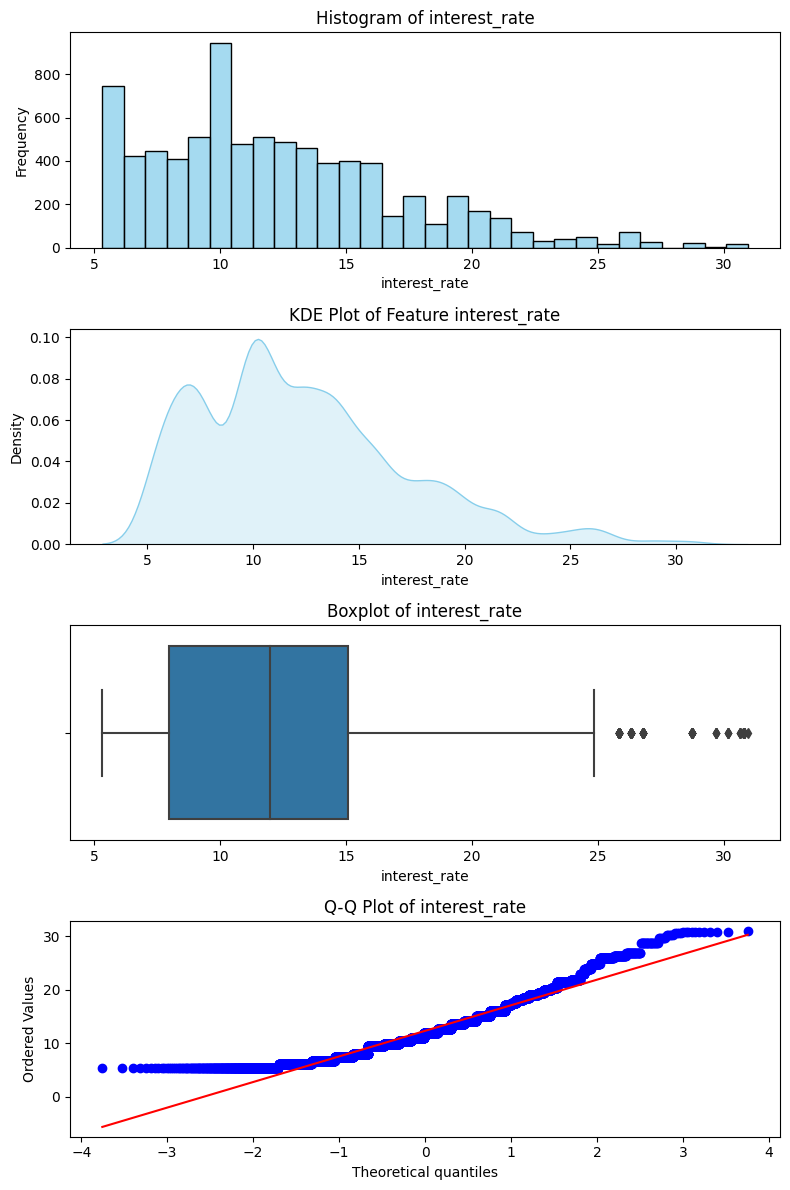

In [24]:
explore_num_feature_distribution(df,'interest_rate')

Insights:
We can see the interest_rate is skewed to right with a median of 11% and has out max interest rate of 30%

In [36]:
feature_eda_insights = dict()

In [37]:
feature_eda_insights['interest_rate'] = 'We can see the interest_rate is skewed to right with a median of 11% and has out max interest rate of 30%'

<h5>3.7.2 Featurewise Exploration and Analysis

3.7.2.1 emp_length 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [42]:
num_feature_exploration_emp_length = explore_num_feature(df,'emp_length')


# Append the exploration results dictionary as a new row to the DataFrame
num_feature_exploration_df = num_feature_exploration_df.append(num_feature_exploration_emp_length, ignore_index=True)



Name of the Feature is emp_length
emp_length is Numerical Feature
The number of unique values in emp_length is 11
emp_length is Numerical Feature and Discrete
Null %age of emp_length is 7.2347869548919155%
IQR is 8.0


SUMMARY

Name of the Feature is emp_length
emp_length is Numerical Feature and Discrete
Null %age of emp_length is 7.2347869548919155%
The number of unique values in emp_length is 11
Total number of outliers in emp_length is 0
Minimum value of outliers in emp_length is 0.0 and number of times its repeated is 584
Maximum value of outliers in emp_length is 10.0 and number of times its repeated is 2655
emp_length Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000     0.0
0.2000     2.0
0.5000     6.0
0.7500    10.0
0.8000    10.0
0.8500    10.0
0.9000    10.0
0.9500    10.0
0.9900    10.0
0.9950    10.0
0.9990    10.0
0.9999    10.0
Name: emp_length, dtype: float64


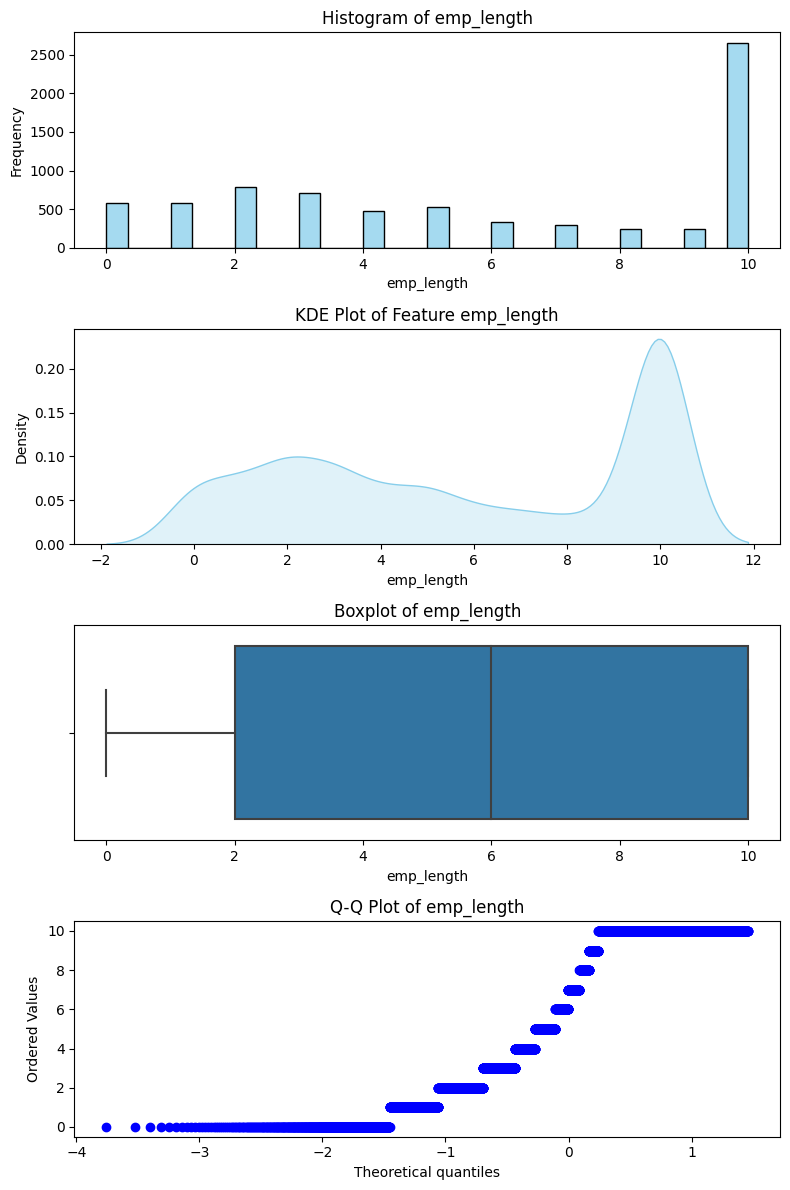

In [26]:
explore_num_feature_distribution(df,'emp_length')

There are null values in emp_length

In [27]:
columns_list = df.columns

In [29]:
emp_length_null = df[df.emp_length.isnull()]
missing_value_counts = emp_length_null.groupby('verified_income').size().sort_values()

missing_value_counts

verified_income
Source Verified    135
Verified           213
Not Verified       231
dtype: int64

In [30]:
missing_value_counts_1 = emp_length_null.groupby('debt_to_income').size().sort_values()
missing_value_counts_1

debt_to_income
18.69    1
23.77    1
23.75    1
23.68    1
23.61    1
        ..
29.60    2
29.97    2
10.92    3
22.08    3
0.00     4
Length: 524, dtype: int64

In [31]:
# After viewing, reset options to default values (optional)
pd.set_option('display.max_rows', 20)  # Reset to default or desired value
pd.set_option('display.max_columns', 45)  # Reset to default or desired value

In [32]:
emp_length_null[emp_length_null.debt_to_income == 0]

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate
178,NaN,TX,MORTGAGE,20000.0,Source Verified,0.0,0,NaN,2000,3,14,7,64000,0,0,0,NaN,0,0,0,1,5.0,7,0.0,0,0,10000,11,6,0,2,100.0,0,other,individual,10000,60,9.92
3238,NaN,FL,OWN,25000.0,Source Verified,0.0,0,NaN,2008,1,9,5,16200,0,0,0,NaN,0,0,0,3,0.0,5,0.0,0,0,15200,9,5,0,0,100.0,0,major_purchase,individual,6000,36,13.58
3246,NaN,NY,RENT,28000.0,Source Verified,0.0,0,NaN,2000,0,4,0,0,0,0,0,NaN,0,0,0,0,20.0,0,0.0,0,0,0,2,0,0,0,100.0,0,major_purchase,individual,2500,36,21.85
3409,NaN,NC,MORTGAGE,44000.0,Source Verified,0.0,0,NaN,2003,0,8,3,30700,0,0,0,NaN,0,0,0,2,NaN,3,0.0,0,0,30700,6,3,0,0,100.0,0,house,individual,10000,36,5.32


In [33]:
missing_value_counts_2 = emp_length_null['annual_income'].min()
missing_value_counts_2

9000.0

The null values in emp_length feature for 4 records we heve seen that debt_to_income ratio is 0. For those 4 cases account_never_delinq_percent is 100 also total_credit_itilized is 0

As emp_length is discrete we will treat it as categorical variable to analyse pattern withh interest_rate

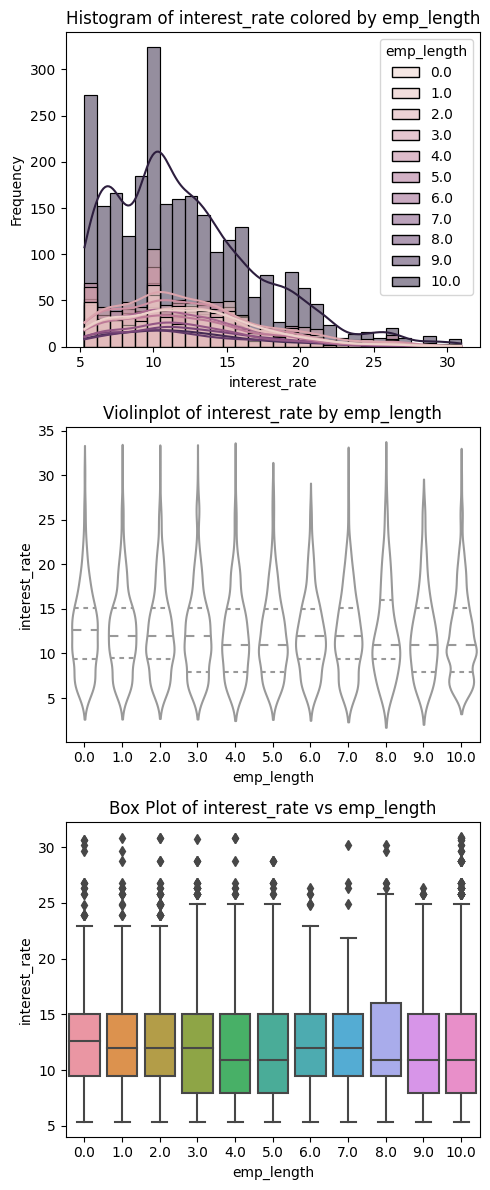

In [35]:
bivariate_analysis_num_cat(df,'interest_rate','emp_length')

Insights:
Null values were found to be 7%, There are no outliers as per IQR. We have negatively skewed data with a longer tail on left side. We will transform the data in the next step.

In [44]:
feature_eda_insights['emp_length'] = 'Null values were found to be 7%, There are no outliers as per IQR. The null values in emp_length feature for 4 records we heve seen that debt_to_income ratio is 0. For those 4 cases account_never_delinq_percent is 100 also total_credit_itilized is 0'

3.7.2.2 state 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2.3 homeownership 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2.4 annual_income 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2.5 verified_income

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2.6 debt_to_income 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

3.7.2._ char 

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?